# Airline Tweet Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
os.getcwd()

'D:\\L\\Internship\\IIC'

In [2]:
df=pd.read_csv('D:\\L\\Internship\\IIC\\Dataset\\Tweets - tweets.csv',parse_dates=['tweet_created'])
df=df.sort_values('tweet_created')
print(df.shape)
df.head()

(14640, 9)


,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8965,5.675883e+17,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05-08:00,USA,Sydney
8964,5.675900e+17,Delta,nesi_1992,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02-08:00,undecided,Pacific Time (US & Canada)
4325,5.675915e+17,United,CPoutloud,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48-08:00,"Washington, DC",NaN
4324,5.675924e+17,United,brenduch,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20-08:00,NaN,Buenos Aires
6745,5.675944e+17,Southwest,VahidESQ,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36-08:00,"Los Angeles, CA",Pacific Time (US & Canada)


In [3]:
# No. of tweets per airline
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

>We can't make assumptions about public opinions about Virgin america airlines when compared to other airlines as it's tweet count is nearly 1/5th of the other airlines. Can also mean it's less tweeted about but can't assume that either using just this dataset.

In [4]:
#preprocessing the text data
''' pd.unique(df['airline']) array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American'], dtype=object)'''
# df['text'].loc[df['airline']=='United']
import re
import nltk
import emoji
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
import preprocessor as p
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from string import punctuation
stop_words = set(stopwords.words('english'))   
# porter = PorterStemmer()

In [5]:
emoji.emojize(":thumbs_up:")
# print(emoji.demojize(x).lstrip(':').rstrip(':').replace('_',' '))

'👍'

In [6]:
# emoticons_happy = set([
#     ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
#     ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
#     '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
#     'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
#     '<3'
#     ])
# emoticons_sad = set([
#     ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
#     ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
#     ':c', ':{', '>:\\', ';('
#     ])
# for i in df['text']:
#     j=i.split()
#     for k in j:
#         if k in emoticons_happy:
#             print(i)
#     No emoticons detected in the text, emojis are present.

In [7]:
def Preprocess(df,column):
    #Handling emojis, replacing them with depictive words.
    df[column] = df[column].apply(lambda x: ''.join([emoji.demojize(c).lstrip(':').rstrip(':').replace('_',' ') for c in x]))
    # removing punctuations.
    df[column] = df[column].apply(lambda x: ''.join([c for c in x if c not in punctuation]))
    df[column] = df[column].apply(lambda x: ''.join([c for c in x]))
    df[column] = df[column].apply(lambda x: word_tokenize(x))
    df[column] = df[column].apply(lambda x: [w for w in x if w not in stop_words])
    df[column] = df[column].apply(lambda x: [w for w in x if w.isalpha()])
    df[column] = df[column].apply(lambda x: [w.lower() for w in x])
    df[column] = df[column].apply(lambda x: ' '.join(x))
    df[column] = df[column].apply(lambda x: ''.join(x))
    return df[column]

def clean_text(text):
    # handling the twitter handles and URLs
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    # handling other abbreviations
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"nan", " ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = text.strip(' ')
    return text

In [8]:
clean_text('@JetBlue is REALLY getting on my nerves !! 😡😡')

'is REALLY getting on my nerves'

In [9]:
df['text']= df['text'].map(lambda com : clean_text(com))
df['text']=Preprocess(df,'text')

In [10]:
#Appearance of the preprocessed text
df['text'][0:5]

8965    new ceo seeks right balance please passengers ...
8964                       really getting nerves nothappy
4325    yes we waited line almost hour some passengers...
4324    got gate iah time given seats closed flight if...
6745    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

In [11]:
text=' '.join([i for i in df['text']])
blob = TextBlob(text)
Sentiment = blob.sentiment     
polarity = Sentiment.polarity
subjectivity = Sentiment.subjectivity

In [12]:
sentiments=[]
polarity=[]
subjectivity=[]
for i,row in df.iterrows():
    blob = TextBlob(row.text)
    Sentiment = blob.sentiment
    if Sentiment.polarity>0:
        sentiments.append('Positive')
    elif Sentiment.polarity<0:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')
    #Polarity tells us about the extent of positivity or negativity the blob of text has
    polarity.append(Sentiment.polarity)
    # How subjective or objective the text is
    subjectivity.append(Sentiment.subjectivity)

In [13]:
df['Sentiment']=sentiments
df['Polarity']=polarity
df['Subjectivity']=subjectivity

In [14]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Sentiment,Polarity,Subjectivity
8965,5.675883e+17,Delta,JetBlueNews,0,new ceo seeks right balance please passengers ...,NaN,2015-02-16 23:36:05-08:00,USA,Sydney,Positive,0.140693,0.330087
8964,5.675900e+17,Delta,nesi_1992,0,really getting nerves nothappy,NaN,2015-02-16 23:43:02-08:00,undecided,Pacific Time (US & Canada),Positive,0.200000,0.200000
4325,5.675915e+17,United,CPoutloud,0,yes we waited line almost hour some passengers...,NaN,2015-02-16 23:48:48-08:00,"Washington, DC",NaN,Negative,-0.125000,0.125000
4324,5.675924e+17,United,brenduch,0,got gate iah time given seats closed flight if...,NaN,2015-02-16 23:52:20-08:00,NaN,Buenos Aires,Negative,-0.100000,0.100000
6745,5.675944e+17,Southwest,VahidESQ,0,cool bags take bit longer dont give baggage bl...,NaN,2015-02-17 00:00:36-08:00,"Los Angeles, CA",Pacific Time (US & Canada),Positive,0.175000,0.375000


In [15]:
Sentiment_analysis= df.to_csv (r'D:\\L\\Internship\\IIC\\Dataset\\sentimentAnalysis.csv', index = None, header=True)

In [16]:
Dict_sent=dict(df['Sentiment'].value_counts())

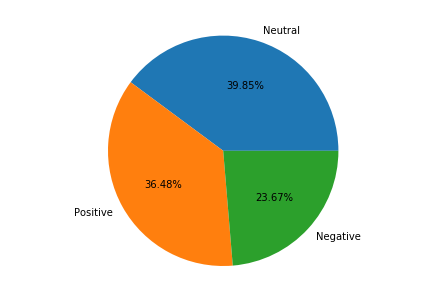

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sections = [i for i in Dict_sent.keys()]
values = [i for i in Dict_sent.values()]
ax.pie(values, labels = sections,autopct='%1.2f%%')
plt.show()

>> MANY NEUTRAL COMMENTS SEEM TO BE JUST NEGATIVE COMMENTS THAT HAVE BEEN PHRASED DIFFERENTLY AND ARE TRICKING THE ANALYSER

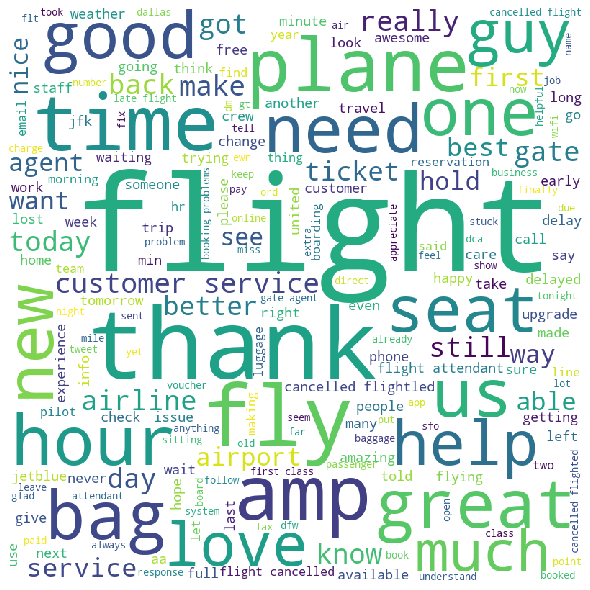

In [18]:
#POSITIVE SENTIMENT WORDCLOUD
stopwords = set(STOPWORDS) 
words="".join([w for w in df['text'].loc[df['Sentiment']=='Positive']])
wordcloud = WordCloud(width = 800, height = 800,background_color ='white', stopwords = stopwords, min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

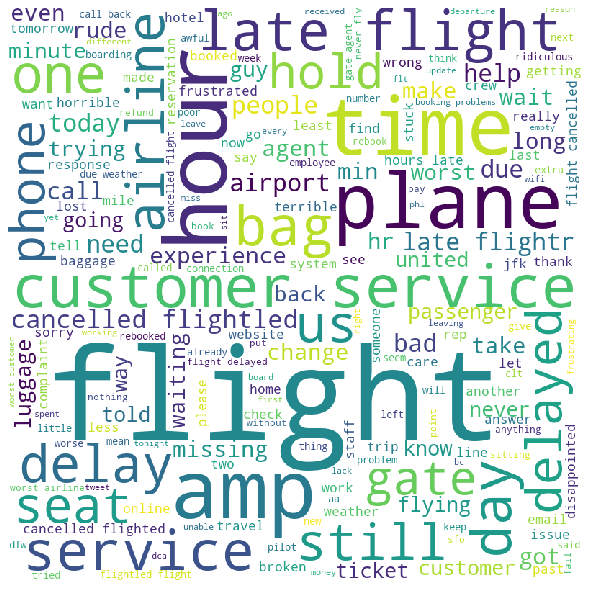

In [19]:
#NEGATIVE SENTIMENT WORDCLOUD 
words="".join([w for w in df['text'].loc[df['Sentiment']=='Negative']])
wordcloud = WordCloud(width = 800, height = 800,background_color ='white', stopwords = stopwords, min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [20]:
sub_df=df.loc[df.retweet_count!=0]
print(sub_df.shape)
sub_df.loc[df.Sentiment=='Positive'].shape

(767, 12)


(267, 12)

> Only 767 out of 14000 tweets have been retweeted
>> Only 267 retweets are Positive in nature the rest 500 are negative or neutral or negatives falsely classified as neutral

In [21]:
D={}
for i in pd.unique(df['airline']):
    df_=df.loc[df['airline']==i]
    Dict_sent=dict(df_['Sentiment'].value_counts())
    D[i]=Dict_sent
D

{'Delta': {'Positive': 950, 'Neutral': 918, 'Negative': 354},
 'United': {'Neutral': 1452, 'Positive': 1337, 'Negative': 1033},
 'Southwest': {'Positive': 980, 'Neutral': 977, 'Negative': 463},
 'US Airways': {'Neutral': 1141, 'Positive': 890, 'Negative': 882},
 'Virgin America': {'Positive': 218, 'Neutral': 217, 'Negative': 69},
 'American': {'Neutral': 1129, 'Positive': 965, 'Negative': 665}}

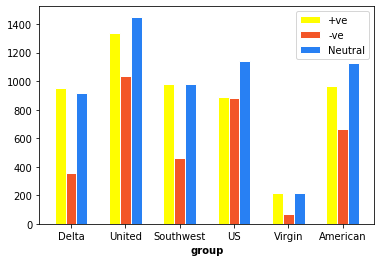

In [22]:
# set width of bar
barWidth = 0.20
 
# set height of bar
bars1 = []
bars2 = []
bars3 = []
for i in D.keys():
    bars1.append(D[i]['Positive'])
    bars2.append(D[i]['Negative'])
    bars3.append(D[i]['Neutral'])

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#FFFE00', width=barWidth, edgecolor='white', label='+ve')
plt.bar(r2, bars2, color='#F35628', width=barWidth, edgecolor='white', label='-ve')
plt.bar(r3, bars3, color='#2880F3', width=barWidth, edgecolor='white', label='Neutral')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [i.split()[0] for i in D.keys()])
 
# Create legend & Show graphic
plt.legend()
plt.show()


Delta


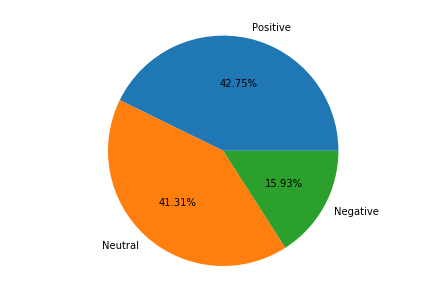

United


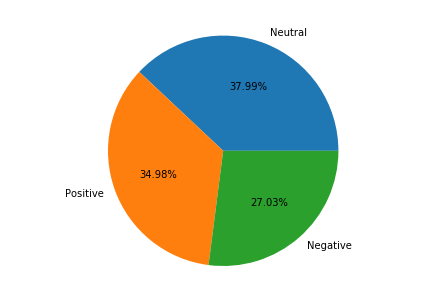

Southwest


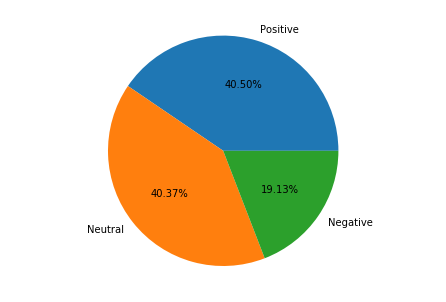

US Airways


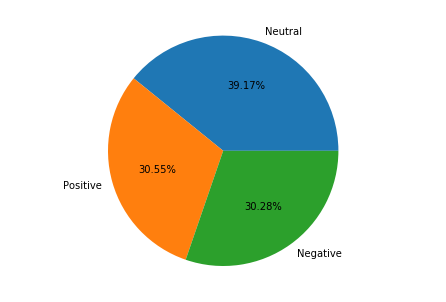

Virgin America


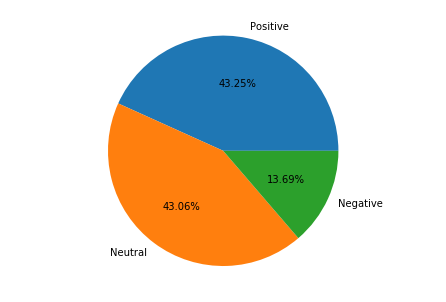

American


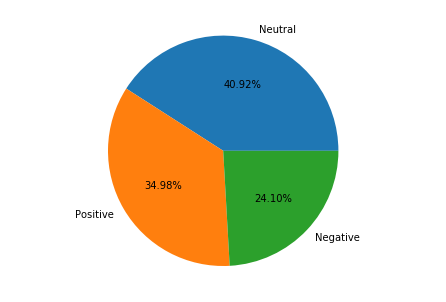

In [23]:
airlines=np.array([i for i in D.keys()])
for i in range(len(D)):
    fig = plt.figure(i)
    print(airlines[i])
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    sections = [i for i in D[airlines[i]].keys()]
    values = [i for i in D[airlines[i]].values()]
    ax.pie(values, labels = sections,autopct='%1.2f%%')
    plt.show()